In [1]:
import geopandas as gpd

import pandas as pd
import altair as alt

In [2]:
# simplyfied shapes (QGIS: v.generalize: douglas 1000m & lang 1000m, dissovle by RS)
# Trier verschmolzen (07211)
simp_shapes = gpd.read_file(r"input\kfz250.utm32s.shape\kfz250\KFZ250_simp.shp")
simp_shapes.head()

RS                                           geometry
0  01001  POLYGON ((529161.665 6067302.052, 524393.533 6...
1  01002  POLYGON ((576967.613 6012251.045, 573187.013 6...
2  01003  POLYGON ((608039.127 5958968.208, 604500.498 5...
3  01004  POLYGON ((561869.142 5986355.578, 562659.983 5...
4  01051  MULTIPOLYGON (((513041.664 5971238.145, 501934...

In [3]:
data_shapes = gpd.read_file(r"input\kfz250.utm32s.shape\kfz250\KFZ250.shp", encoding='utf8')
data_shapes=data_shapes[data_shapes.OBA!='AX_Gemeinde']
data_shapes.head()

DEBKGID              NNID                       NAME     RS  \
0  DEBKGDL20000E09W  DEBKGGND00001GXG                  Ahrweiler  07131   
1  DEBKGDL20000DXC9  DEBKGGND00001I1R          Aichach-Friedberg  09771   
2  DEBKGDL20000E15K  DEBKGGND00001EL9            Alb-Donau-Kreis  08425   
3  DEBKGDL20000E3TM  DEBKGGND00001BZF           Altenburger Land  16077   
4  DEBKGDL20000E5OP  DEBKGGND00003ETK  Altenkirchen (Westerwald)  07132   

                          OBA       KFZ   GEOLA   GEOBR                GKRE  \
0  AX_KreisRegion (Landkreis)        AW  070241  502803   3361262.387718042   
1  AX_KreisRegion (Landkreis)  AIC  FDB  110310  482539  3651986.0465467926   
2  AX_KreisRegion (Landkreis)        UL  094033  482052   3550163.619539565   
3  AX_KreisRegion (Landkreis)  ABG  SLN  122357  505723  3738878.2448340463   
4  AX_KreisRegion (Landkreis)        AK  075316  504743   3421659.620679839   

                 GKHO               UTMRE              UTMHO  \
0   5594242.904947102  361242.67351459956  5592445.943886978   
1     5367546.0959312   651849.6935602885  5365838.105469814   
2   5356890.314130571   550068.1785403717  5355186.990382587   
3  5652298.8263979005    738708.602247474  5650475.716781135   
4   5629463.745006214  421616.25201288454  5627652.534789168   

                                            geometry  
0  POLYGON ((373017.694 5612406.378, 373074.050 5...  
1  POLYGON ((649708.252 5386592.734, 650041.270 5...  
2  POLYGON ((569873.319 5386882.457, 570014.992 5...  
3  POLYGON ((734500.132 5665908.906, 734539.242 5...  
4  POLYGON ((416304.490 5643695.353, 416558.493 5...

In [4]:
data_shapes=pd.merge(simp_shapes,data_shapes[['NAME', 'RS']], on='RS')
data_shapes.head()

RS                                           geometry          NAME
0  01001  POLYGON ((529161.665 6067302.052, 524393.533 6...     Flensburg
1  01002  POLYGON ((576967.613 6012251.045, 573187.013 6...          Kiel
2  01003  POLYGON ((608039.127 5958968.208, 604500.498 5...        Lübeck
3  01004  POLYGON ((561869.142 5986355.578, 562659.983 5...    Neumünster
4  01051  MULTIPOLYGON (((513041.664 5971238.145, 501934...  Dithmarschen

In [5]:
## adding kba data

In [6]:
kba_data= pd.read_excel(r"input\fz1_2019_xlsx.xlsx", sheet_name='Kfz_u_Kfz_Anh', skiprows=8, nrows=444)
#
#kba_data= kba_data[['Unnamed: 3', 'Unnamed: 4',
#       'Benzin', 'Diesel', 'Gas\n(einschl.\nbivalent)', 'Hybrid \ninsgesamt',
#       'darunter Hybrid mit \nPlug-in', 'Elektro', 'sonstige']].copy()
#
#kba_data=kba_data.rename(columns={'Unnamed: 3':'Zulassungsbezirk', 
#                                  'Unnamed: 4': 'Insgesamt', 
#                                  'Gas\n(einschl.\nbivalent)': 'Gas', 
#                                  'Hybrid \ninsgesamt': 'HEV', 
#                                  'darunter Hybrid mit \nPlug-in': 'PHEV', 
#                                  'Elektro': 'BEV'})

In [7]:
kba_data.head()

Unnamed: 0                Land                   Regierungsbezirk  \
0         NaN  BADEN-WUERTTEMBERG  RB STUTTGART                        
1         NaN                 NaN                                NaN   
2         NaN                 NaN                                NaN   
3         NaN                 NaN                                NaN   
4         NaN                 NaN                                NaN   

  Statistische Kennziffer und Zulassungsbezirk  insgesamt  \
0     08111  STUTTGART,STADT                        24664   
1     08115  BOEBLINGEN                             23804   
2     08116  ESSLINGEN                              34988   
3     08117  GOEPPINGEN                             17279   
4     08118  LUDWIGSBURG                            32604   

   davon zwei-rädrige Kfz  davon drei-\nrädrige Kfz  \
0                   24000                       405   
1                   23259                       250   
2                   34083                       421   
3                   16820                       159   
4                   31851                       337   

   davon leichte vierrädrige Kfz  darunter weibliche Halter  insgesamt.1  ...  \
0                            259                       3256       301793  ...   
1                            295                       3267       253000  ...   
2                            484                       5072       329698  ...   
3                            300                       2546       163772  ...   
4                            416                       4425       329497  ...   

   unbe-\nkannt  insgesamt.3  darunter \nSattelzug-\nmaschinen  \
0             7         3035                               959   
1             6         7357                               401   
2            12        11009                              1172   
3             4         8145                               565   
4            10        11324                              1168   

   darunter\nland-/forst-\nwirtschaft-\nliche Zug-\nmaschinen  \
0                                               1337            
1                                               4377            
2                                               5512            
3                                               4828            
4                                               6499            

   land-/forst-\nwirtschaft-\nliche Zug-\nmaschinen\nbeinhalten\nleichte Zug-maschinen  \
0                                                139                                     
1                                                214                                     
2                                                298                                     
3                                                181                                     
4                                                284                                     

   Unnamed: 35  Unnamed: 36 insgesamt.4  Kfz-Dichte\nje 1.000 \nEinwohner  \
0         1518        21382      347839                               550   
1          841        19132      295936                               760   
2         1338        30555      395241                               742   
3          650        18254      199305                               777   
4         1270        30893      392994                               724   

   Unnamed: 39  
0        18500  
1        28150  
2        42298  
3        24172  
4        38831  

[5 rows x 40 columns]

In [8]:
kba_data= kba_data[['Statistische Kennziffer und Zulassungsbezirk',
       'PKW-Dichte\nje 1.000 \nEinwohner']].copy()

In [9]:
kba_data=kba_data.rename(columns={'Statistische Kennziffer und Zulassungsbezirk':'Zulassungsbezirk', 
                                  'PKW-Dichte\nje 1.000 \nEinwohner': 'PKW-Dichte'})

In [10]:
kba_data['RS']=kba_data.Zulassungsbezirk.str[:5]

In [11]:
kba_data=kba_data.drop(columns=['Zulassungsbezirk'])


In [12]:
kba_data

PKW-Dichte     RS
0           477  08111
1           649  08115
2           619  08116
3           639  08117
4           607  08118
..          ...    ...
439         561  16073
440         594  16074
441         617  16075
442         608  16076
443         566  16077

[444 rows x 2 columns]

In [13]:
data_merg=pd.merge(data_shapes,kba_data, on='RS')
data_merg.head()

RS                                           geometry          NAME  \
0  01001  POLYGON ((529161.665 6067302.052, 524393.533 6...     Flensburg   
1  01002  POLYGON ((576967.613 6012251.045, 573187.013 6...          Kiel   
2  01003  POLYGON ((608039.127 5958968.208, 604500.498 5...        Lübeck   
3  01004  POLYGON ((561869.142 5986355.578, 562659.983 5...    Neumünster   
4  01051  MULTIPOLYGON (((513041.664 5971238.145, 501934...  Dithmarschen   

   PKW-Dichte  
0         495  
1         444  
2         455  
3         529  
4         605

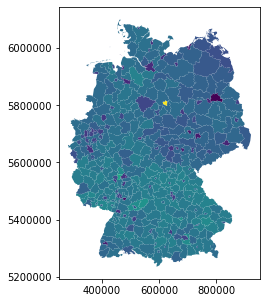

In [14]:
#check map
data_merg.plot(column='PKW-Dichte',figsize=(5,5))

In [15]:
import branca.colormap as cm
def highlight_function(feature):
    return {
       # 'fillColor': '#ffaf00',
        'color': 'grey',
        'weight': 3,
       # 'opacity':0,
        'dashArray': '5, 5'
    }

In [19]:
import folium

m = folium.Map(
    location=[51, 11.5],
    zoom_start=7,
    tiles= 'cartodbpositron'#"stamentoner"#

)
df= data_merg#[:20]#[['segment_id','speed_kph_mean','geometry','id']]
fieldname='PKW-Dichte'

cm2 = cm.LinearColormap(['green','yellow','red'],
                        index=[500,600,700],
                            vmin=df[fieldname].min(), 
                            vmax=df[fieldname].max())

cm2.caption = 'PKW-Dichte je Zulassungsbezirk, KBA 2019'
m.add_child(cm2)


folium.GeoJson(
        df,
        style_function = lambda x: {
            'color':     'grey',#cm2(x['properties'][fieldname]),
            'weight': 0.4,
            'fillColor':     cm2(x['properties'][fieldname]),
            'fillOpacity':   0.4,
            'opacity':   0.9,},
        highlight_function =highlight_function,
        tooltip=folium.features.GeoJsonTooltip(fields=['NAME','PKW-Dichte'],
                                               aliases=['NAME','PKW-Dichte']
                                              )
    ).add_to(m)
    
m

C:\Users\Simon\Anaconda3\envs\geo_julab\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [20]:
m.save("pkw_besitz_zulassungsbezirke.html")

In [ ]:
#https://www.bbsr.bund.de/BBSR/DE/Home/Topthemen/2018-oev-erreichbarkeit.html

In [ ]:
############### ALTAIR

In [71]:
data_merg_crs = data_merg.to_crs({'init': 'epsg:4326'})

D:\Anaconda3\envs\geo_julab\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [105]:
data_merg_crs.sort_values('PKW-Dichte')

RS                                           geometry  \
322  11000  POLYGON ((13.64741 52.33831, 13.64336 52.37739...   
193  08221  POLYGON ((8.62568 49.35216, 8.60132 49.36597, ...   
359  14713  POLYGON ((12.25808 51.23815, 12.24994 51.28632...   
363  15002  POLYGON ((11.98320 51.40321, 11.91547 51.44214...   
201  08311  POLYGON ((7.89295 47.90662, 7.86290 47.91300, ...   
..     ...                                                ...   
183  08125  POLYGON ((9.23659 49.02019, 9.11857 49.06460, ...   
220  09161  POLYGON ((11.37708 48.68876, 11.35444 48.71144...   
184  08126  POLYGON ((9.43790 49.09565, 9.44812 49.11786, ...   
125  06436  POLYGON ((8.41216 49.99813, 8.33064 50.00054, ...   
18   03103  POLYGON ((10.84647 52.31595, 10.80637 52.32994...   

                     NAME  PKW-Dichte  
322                Berlin         335  
193            Heidelberg         376  
359               Leipzig         391  
363         Halle (Saale)         393  
201  Freiburg im Breisgau         402  
..                    ...         ...  
183             Heilbronn         709  
220            Ingolstadt         724  
184        Hohenlohekreis         736  
125     Main-Taunus-Kreis         796  
18              Wolfsburg        1113  

[400 rows x 4 columns]

In [121]:

#source=df[:500].copy()
source=data_merg_crs


###################################
#### MAP ###
field='PKW-Dichte'

base = alt.Chart(source,title=field).mark_geoshape(
    stroke='gray',
    strokeWidth=0.5,
    opacity=0.6
).encode(
    color =  alt.Color(str(field) +':Q',
                        legend=alt.Legend(title=field),#labelColor='green'),
                       #labels=['bASF'],
                       #scale=alt.Scale(scheme='blues')),#  format='.1%'),
                        scale=alt.Scale(domain=[400, 600, 800], range=['green','green', 'yellow', 'red', 'red']))
).properties(
    height=700,
    width=500
)

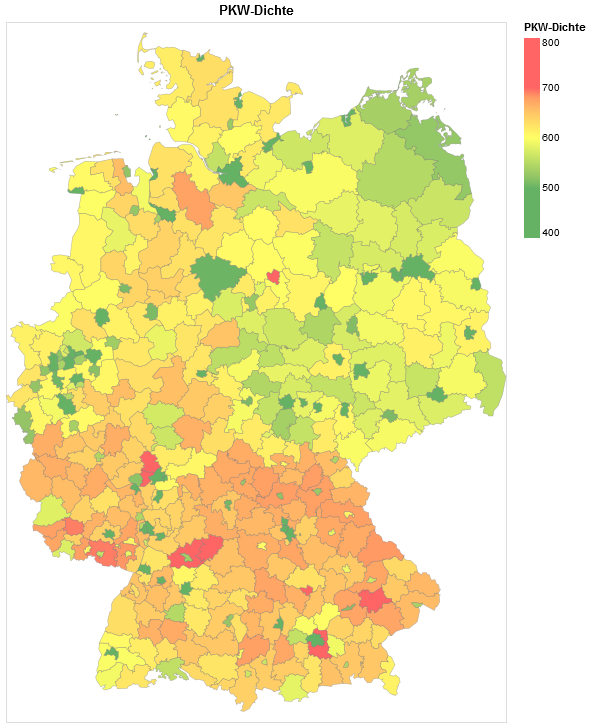

In [122]:
base